In [1]:
# Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import local functions
from general_functions import *

In [2]:
# Import data
reghub_data_link = onedrive_download("https://1drv.ms/u/s!AoiE7xOoBAsngsgsIpu8x82sG1hvtw?e=mDKP33")
df = pd.read_csv(reghub_data_link)

categories_data_link = onedrive_download("https://1drv.ms/u/s!AoiE7xOoBAsngsgwWpNZyYMfloH33A?e=hTRtTD")
df_categories = pd.read_csv(categories_data_link)

In [3]:
df_categories

,Unnamed: 0,legal,sanctions,papers,reports,statements,guidelines,press,personnel,market
0,0,parliamentary decree,launches investigation,Forschungspublikation,analysis report,statement,prompt,press file,Arbeitsvertrag,Aktien:
1,1,Richtlinie,sanktionsmaßnahme,wissenschaftliche Zeitschrift,strategic planning and development report,declaration of principles,behavioral guidelines,media story update,Praktikant:in,Aktie gewinnt
2,2,governmental ruling,is not authorised to,wissenschaftliche Präsentation,programmevaluierungsbericht,discussion,ethics code,news folder,Besetzung von Schlüsselpositionen,buy rating
3,3,municipal regulatory measure,prozess,Fachtagung,projektstatusbericht,advice,professionelle richtlinien,media pack,Bewerbergespräch,sell rating
4,4,parliamentary regulation,disziplinarische geldstrafe,wissenschaftliche Studienergebnisse,politikempfehlungs- und strategiebericht,assembly,prescription,medienberichterstattung,neue Stelle,DAX-Aktien
...,...,...,...,...,...,...,...,...,...,...
283,283,presidential regulatory,NaN,NaN,investment report,NaN,NaN,NaN,NaN,NaN
284,284,legislative regulatory measure,NaN,NaN,investment analysis and opportunities report,NaN,NaN,NaN,NaN,NaN
285,285,regulation,NaN,NaN,trendanalysebericht,NaN,NaN,NaN,NaN,NaN
286,286,legal stipulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14608 entries, 0 to 14607
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                14578 non-null  object 
 1   _index             14552 non-null  object 
 2   _score             29 non-null     object 
 3   _type              14526 non-null  object 
 4   concepts           2260 non-null   object 
 5   found_dates        13808 non-null  object 
 6   id                 14532 non-null  object 
 7   internal_links     13759 non-null  object 
 8   keywords           2369 non-null   object 
 9   language           14516 non-null  object 
 10  news_author        1990 non-null   object 
 11  news_content       14501 non-null  object 
 12  news_date          14504 non-null  object 
 13  news_label         238 non-null    object 
 14  news_last_updated  11 non-null     object 
 15  news_legalinforce  14504 non-null  object 
 16  news_link          145

In [5]:
# Clean the df
df.dropna(subset=["news_content"], inplace=True)
# Create a list of the newly created columns for later use
rule_cols = []
# Create rule based category labels
for category in df_categories.columns[1:]:
    # Keep track of which keywords led to categorization
    df_categories[f"{category}_count"] = 0
    # Add columns for rule-based labels
    df[f"rule_labels_{category}"] = "Other"
    rule_cols.append(f"rule_labels_{category}")
    # Match words from the category lists
    for index, row in df.iterrows():
        for word in list(df_categories[category].dropna()):
            if word.lower() in str(row["news_content"]).lower():
                df.at[index, f"rule_labels_{category}"] = category
                df_categories.loc[df_categories[category] == word, f"{category}_count"] += 1

In [6]:
# Compress the four category columns into one
df['rule_labels_comb'] = df[rule_cols].values.tolist()
df['rule_labels_comb'] = df['rule_labels_comb'].apply(lambda lst: [val for val in lst if val != 'Other'])
df.drop(columns=rule_cols, inplace=True)

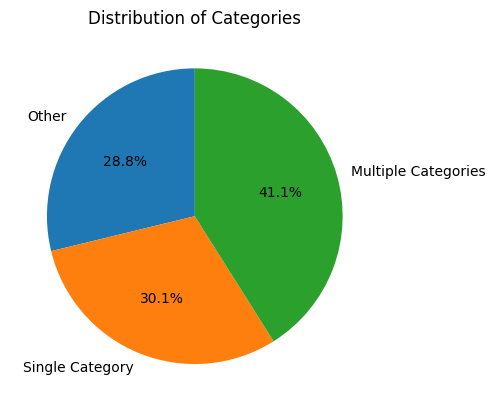

In [7]:
# Visulaization
count_empty = df['rule_labels_comb'].apply(len).eq(0).sum()
count_single = df['rule_labels_comb'].apply(len).eq(1).sum()
count_multiple = df['rule_labels_comb'].apply(len).gt(1).sum()

# Data for plotting
labels = ['Other', 'Single Category', 'Multiple Categories']
sizes = [count_empty, count_single, count_multiple]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.show()

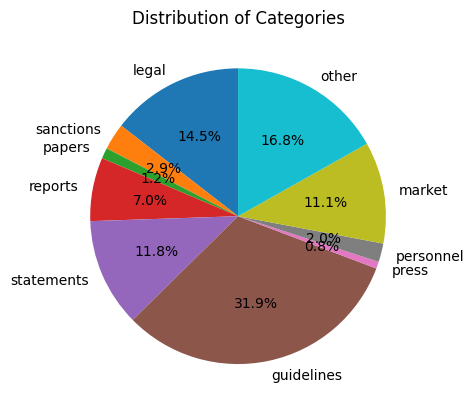

In [8]:
# Visualization
vis_cats = []
for category in df_categories.columns[1:10]:
    vis_cats.append(df['rule_labels_comb'].apply(lambda lst: lst.count(category)).sum())
vis_cats.append(df['rule_labels_comb'].apply(len).eq(0).sum())

# Data for plotting
labels = list(df_categories.columns[1:10]) + ["other"]
sizes = vis_cats
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.show()

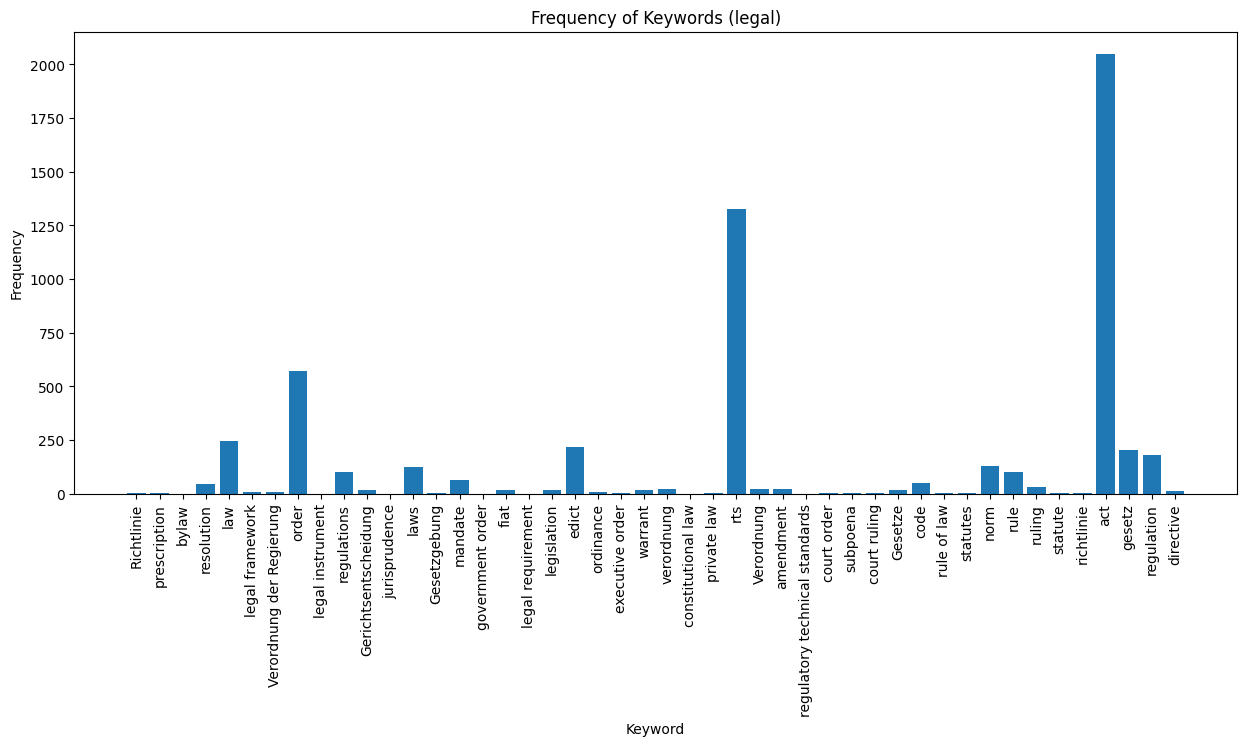

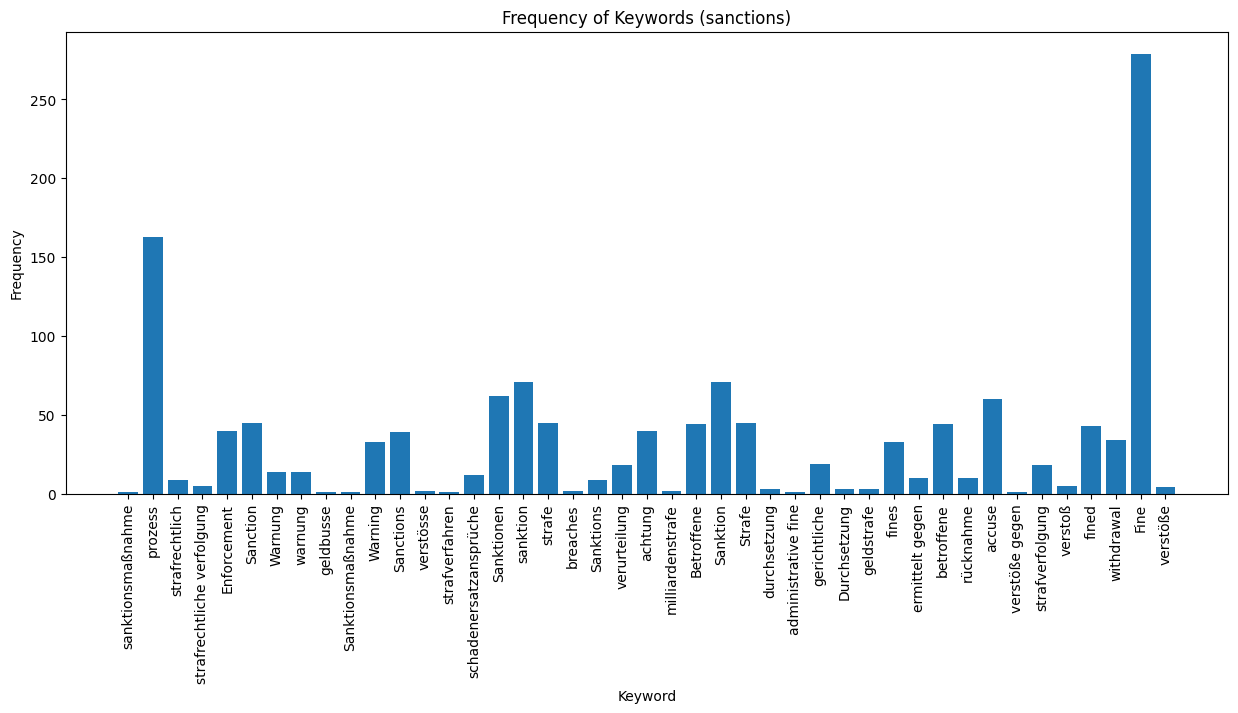

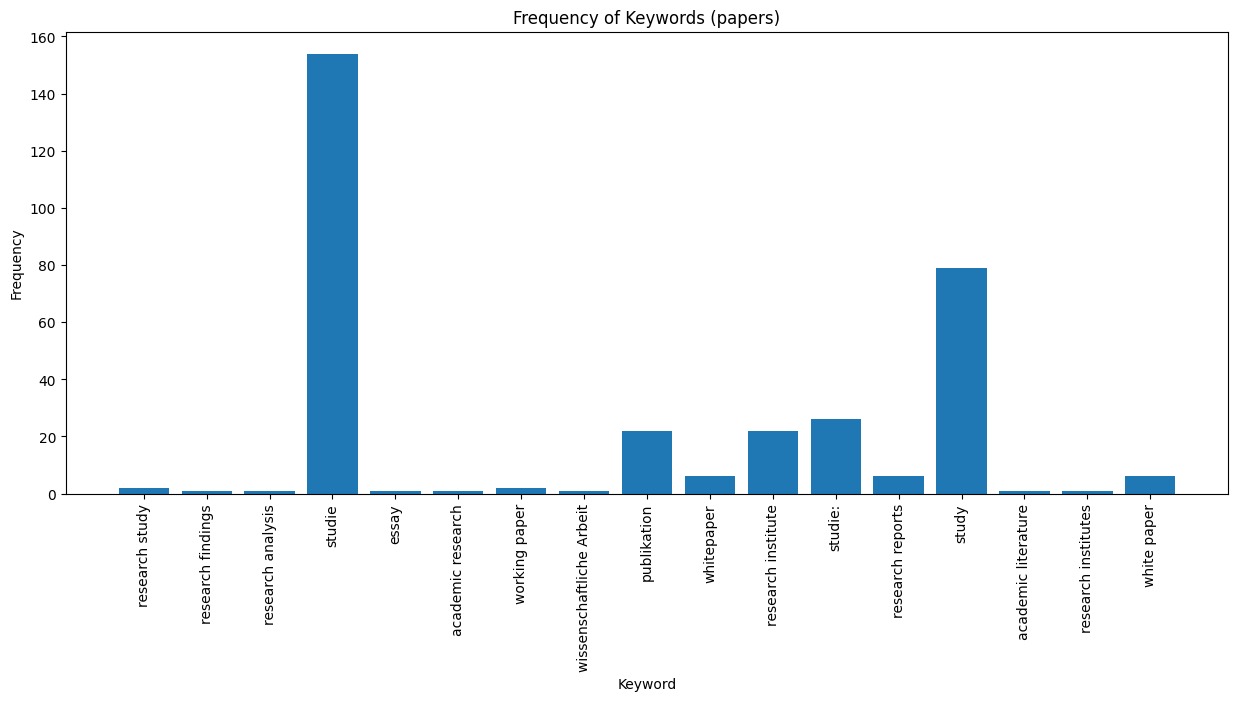

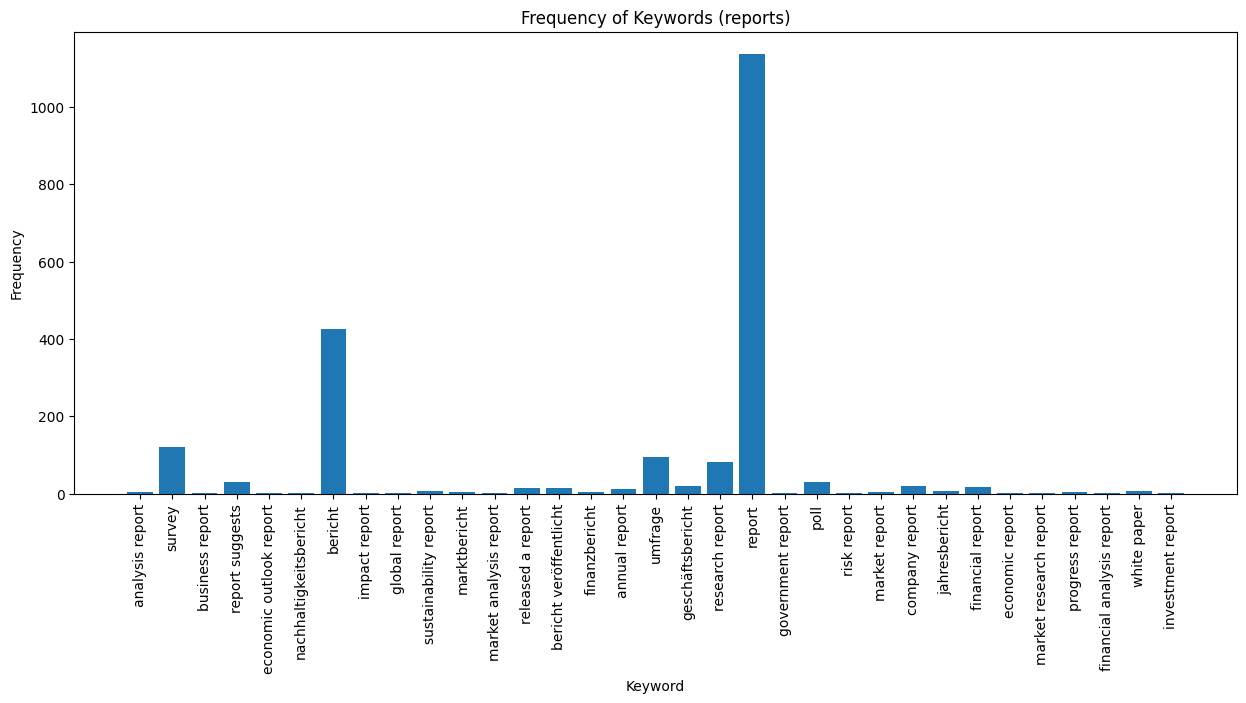

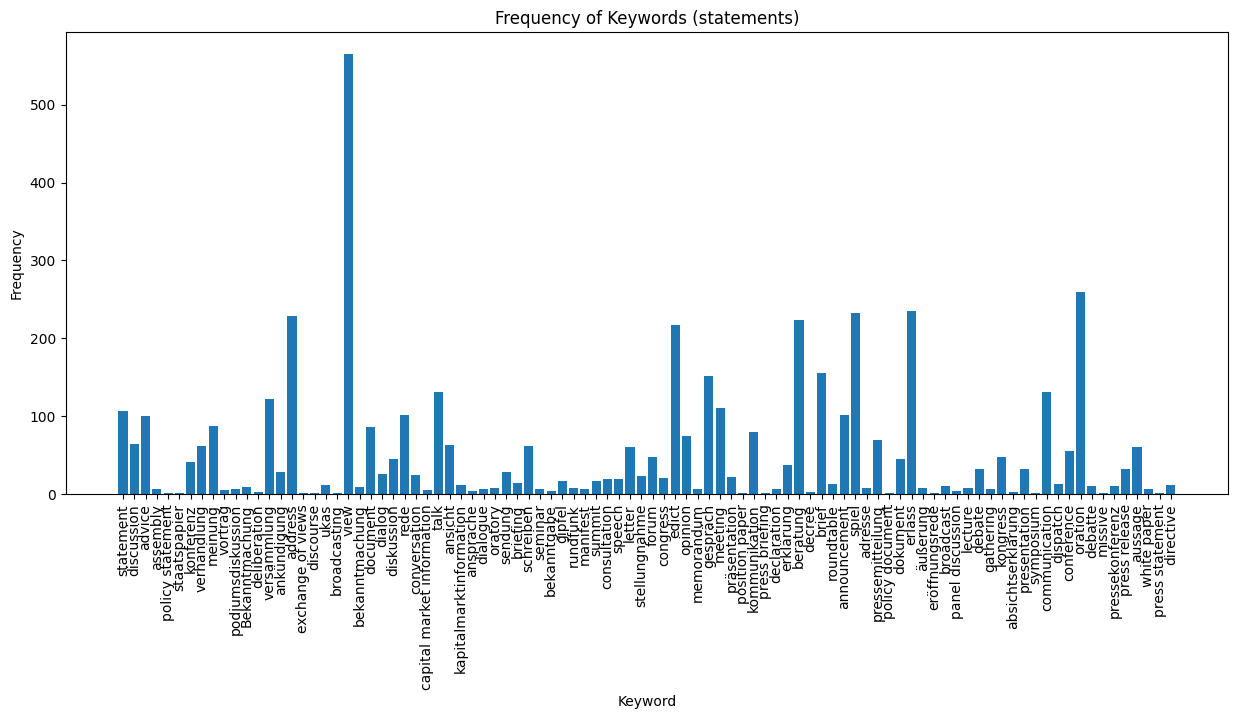

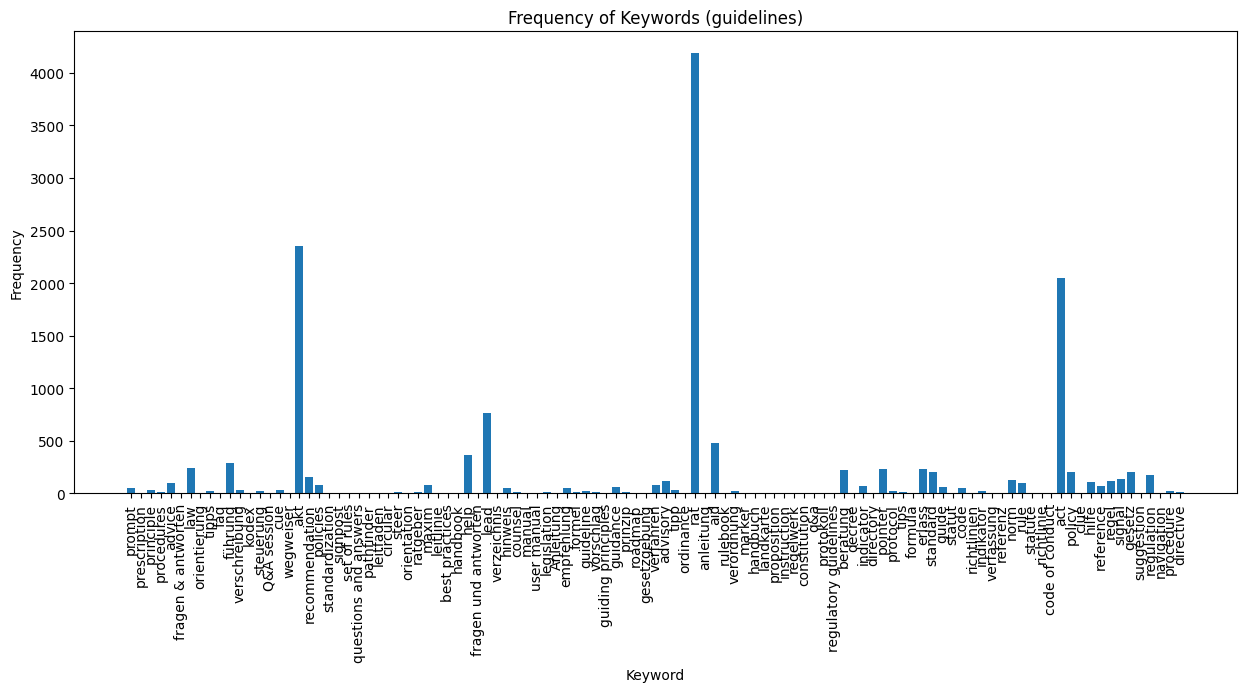

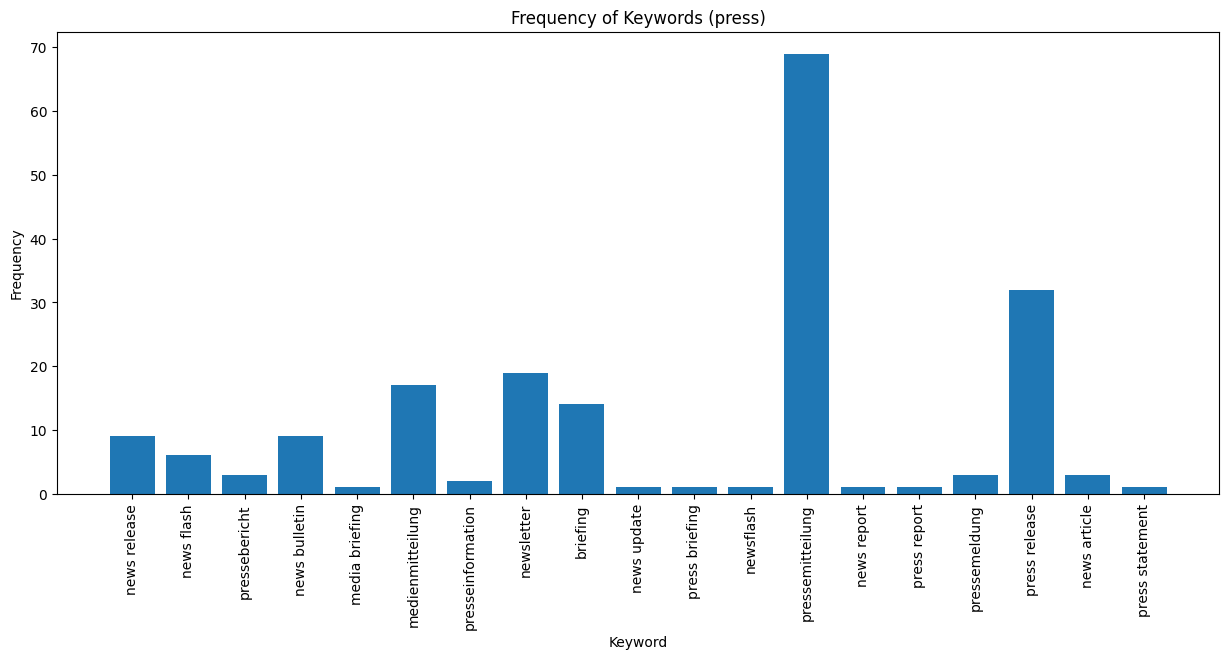

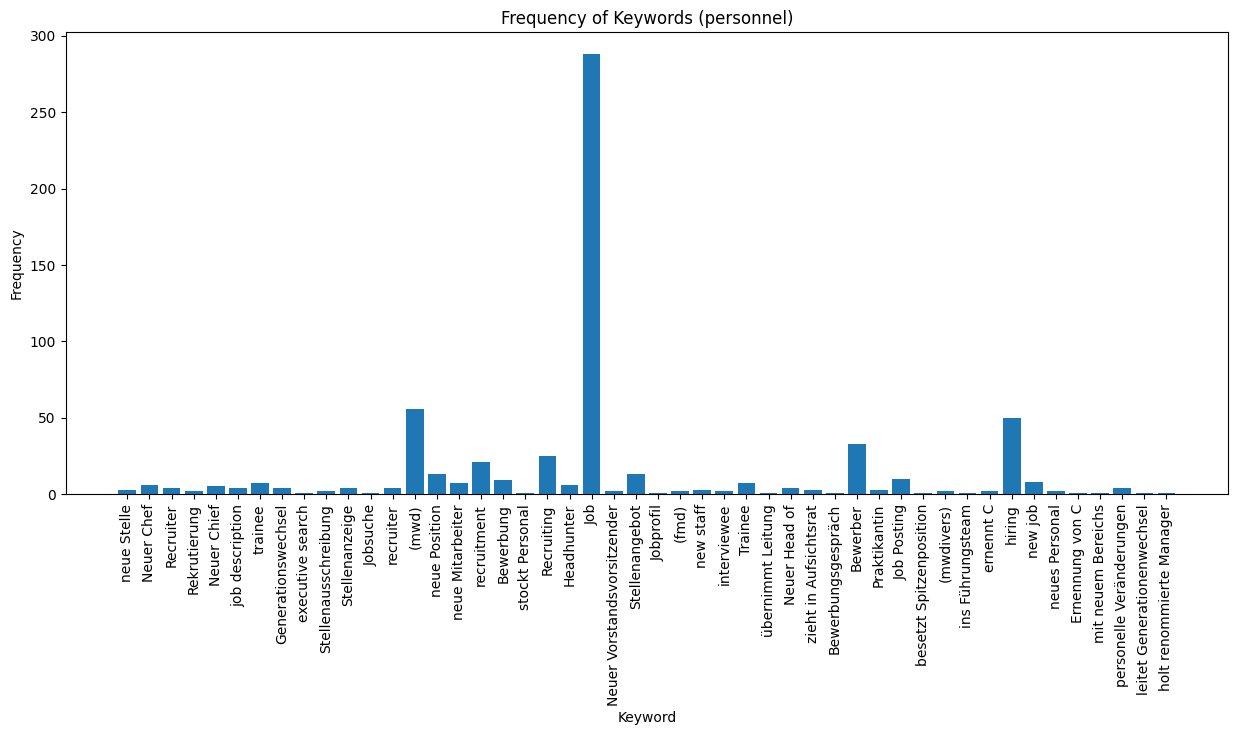

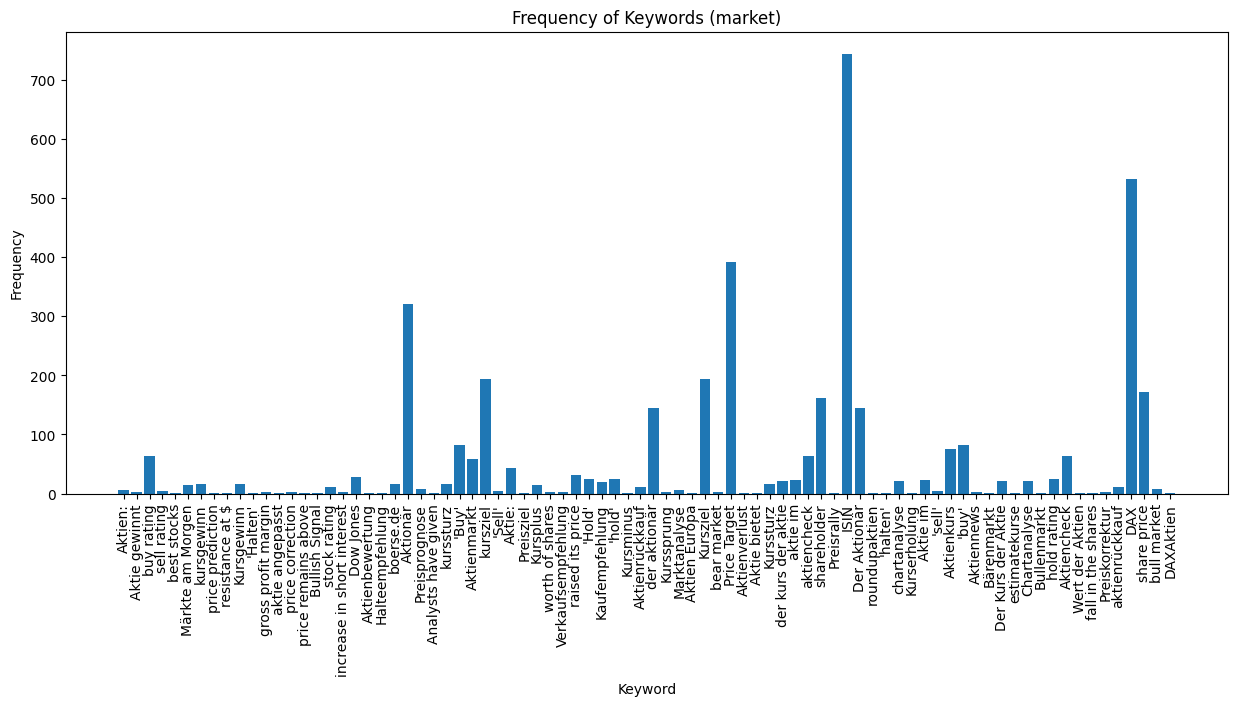

In [9]:
# Iterate over the columns
for column in df_categories.columns[1:10]:
    # Filter the dataframe for non-zero values in the current column
    df_nonzero = df_categories[df_categories[f"{column}_count"] != 0]

    # Calculate the frequency of each category
    keyword_counts = df_nonzero[f"{column}_count"]
    category_names = df_nonzero[column].unique()

    # Create a bar chart
    plt.figure(figsize=(15, 6))
    plt.bar(category_names, keyword_counts)
    plt.title(f'Frequency of Keywords ({column})')
    plt.xlabel('Keyword')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

In [10]:
df.to_csv("../../data_rule_labels_updated.csv")